In [2]:

## 네이버 피낸스에서 주가 스크래핑 하기

from urllib.request import urlopen
from bs4 import BeautifulSoup
import csv


In [ ]:

개요

(0). 웹페이지 구성 방법 이해

    - html 언어


(1). 원하는 영역 파싱하기

        - 크롬 개발자 도구로 영역 따오기

        - BsObject 라이브러리 이용방법
    
            - Find_all 함수 
            - Select 함수
            - get 함수
            - get_text 함수
            
            
            
(2). 파싱을 이용해서 데이터를 구성하기

    - for 문을 이용한 연속적인 데이터 구성
    - csv 파일 저장/로드
    - 스크래핑한 사이트에서 업데이트 있을시 체크기능
    - 특정시간마다 업데이트
    - 텔레그램을 이용한 메세지 알림 기능




In [ ]:

#### 예제 A. 특정 주식 가격 따오기

## (1). 삼성전자 

html = urlopen('https://finance.naver.com/item/main.nhn?code=005930')
bsObject = BeautifulSoup(html, "html.parser")

meta_data = []

for cover in bsObject.find_all('dl' , {"class" : "blind"}):
    print(cover)
    data = []
    for cover2 in cover.find_all('dd'):
        data.append(cover2.get_text())
        print("//")
        print(cover2)
    meta_data.append(data)
print(meta_data)

## (2). 카카오

html = urlopen('https://finance.naver.com/item/main.nhn?code=035720')
bsObject = BeautifulSoup(html, "html.parser")

meta_data = []

for cover in bsObject.find_all('dl' , {"class" : "blind"}):
    data = []
    for cover2 in cover.find_all('dd'):
        data.append(cover2.get_text())
    meta_data.append(data)
    
for sub_data in meta_data:
    for data in sub_data:
        print(data)
        
## (3). 셀트리온

html = urlopen('https://finance.naver.com/item/main.nhn?code=068270')
bsObject = BeautifulSoup(html, "html.parser")

meta_data = []

for cover in bsObject.find_all('dl' , {"class" : "blind"}):
    data = []
    for cover2 in cover.find_all('dd'):
        data.append(cover2.get_text())
    meta_data.append(data)

for sub_data in meta_data:
    for data in sub_data:
        print(data)

In [1]:

### 예제 B. 환율 따오기


## 1. 현재 시점에서 환율 따오기

def get_now_exchange():
    
    
    html = urlopen("https://finance.naver.com/marketindex/exchangeList.nhn")
    bsObject = BeautifulSoup(html, "html.parser")

    i = 0
    exchange_data = []
    cover = bsObject.select('div' , {'class' : "tbl_area"})[0]
    cover2 = cover.select("tbody")[0]
    cover3 = cover.find_all("tr")
    for i,temp in enumerate(cover3):
        if i < 2: continue
        country = cover3[i].select("a")[0].get_text().strip()
        exchange = cover3[i].select("td")[1].get_text()
        exchange_data.append([country , exchange]) 
    
    for e in exchange_data:
        print(e)
    
    
## 2. 과거 시점에서부터 환율 따오기

#base_link = "https://finance.naver.com/marketindex/exchangeDailyQuote.nhn?marketindexCd=FX_USDKRW"


     
def show_exchange(exchange_data):
    for e in exchange_data:
        print(e)
        
# 베이스 링크에 따라 전체 일자별 환율을 리스트 형태로 저장
def get_exchange(base_link):
    
    date = []
    exchange = []
    page = 0
    
    while(1):
        page += 1
        link = base_link + "&page=" + str(page)

        get_page(link , date , exchange)
        if page > 30:
            break
    
    return date , exchange

# html 링크 안에서 USD 날짜/환율을 파싱해서 리턴
def get_page(link , date , exchange):
   
    html = urlopen(link)
    bsObject = BeautifulSoup(html, "html.parser")
    cover = bsObject.select('div' , {'class' : "tbl_area"})[0]
    cover2 = cover.select("tbody")
    cover3 = cover.find_all("tr")
    if len(cover3) == 0:  return True
    
  
    for i,temp in enumerate(cover3):
        if i < 2: continue
        date.append(cover3[i].select("td")[0].get_text())
        exchange.append(float(cover3[i].select("td")[1].get_text().replace(',', '')))
    
    return False
    
    
# 3. 모든 국가에 대해서 환율 따오기


In [66]:

import pandas as pd

hompage_link = "https://finance.naver.com/"
base_link = "https://finance.naver.com/marketindex/exchangeList.nhn"
html = urlopen(base_link)
bsObject = BeautifulSoup(html, "html.parser")

cover = bsObject.select("td.tit>a")

exchange_names = []
total_exchanges = []
date = []
# 다른 국가 환율들 꺼내기 

for i,cover2 in enumerate(cover):
    
    country =  cover2.get("href")[-6:-1]

    country_link = hompage_link + cover2.get("href")
    
    country_html = urlopen(country_link)
    country_bs = BeautifulSoup(country_html, "html.parser")
    
    country_daily_link = hompage_link + country_bs.select("iframe[title=일별시세]")[0].get("src")

    date , exchange = get_exchange(country_daily_link)
    exchange_names.append(country)
    total_exchanges.append(exchange)
 
#     #country_exchange.insert(0 , ["Date" , "country"])
#     total_exchange.append(country_exchange)
#     print(country)
#     print(country_exchange)
    

        

# # csv 형태로 저장
# with open('total_exchange.csv', 'w', newline='') as f: 
#     writer = csv.writer(f)
#     for exchange in total_exchanges:
        
#         writer.writerow(exchange) 
# f.close()


           Date   USDKR    EURKR    JPYKR   CNYKR   HKDKR  TWDKR    GBPKR  \
0    2020.05.18  1234.5  1334.93  1151.00  172.94  159.26  41.12  1497.57   
1    2020.05.19  1226.0  1343.02  1139.56  172.16  158.18  40.93  1500.56   
2    2020.05.20  1229.0  1345.20  1141.98  172.82  158.58  40.98  1506.69   
3    2020.05.21  1230.5  1352.50  1142.26  172.94  158.73  41.13  1505.70   
4    2020.05.22  1240.5  1352.83  1154.65  173.46  159.96  41.29  1511.36   
..          ...     ...      ...      ...     ...     ...    ...      ...   
155  2020.12.29  1093.5  1339.21  1055.04  167.73  141.04  38.95  1474.64   
156  2020.12.30  1087.5  1335.40  1054.55  167.03  140.28  38.69  1479.98   
157  2020.12.31  1088.0  1336.17  1056.11  167.21  140.35  38.73  1487.35   
158  2021.01.04  1082.5  1330.77  1053.22  167.93  139.64  38.55  1482.38   
159  2021.01.05  1085.9  1330.88  1052.99  168.22  140.06  38.66  1473.73   

       OMRKR   CADKR  ...  PKRKR  BDTKR  PHPKR  MXNKR   BRLKR  VNDKR  ZARKR

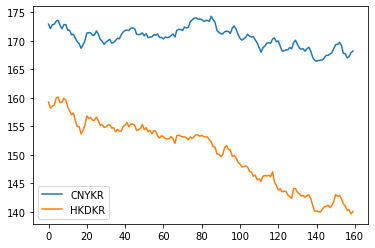

In [97]:

import pandas as pd

## 리스트 -> 판다스 데이터
df = pd.DataFrame({"Date" : reversed(date)})
  
for i,e in enumerate(total_exchanges):
    temp = pd.Series(reversed(e) , name = exchange_names[i] )
    df = df.join(temp)


print(df)


import matplotlib.pyplot as plt
# plt.plot(df["USDKR"].values , label = "USDKR" )
# plt.plot(df["EURKR"].values , label = "EURKR" )
# plt.plot(df["JPYKR"].values , label = "JPYKR" )
plt.plot(df["CNYKR"].values , label = "CNYKR" )
plt.plot(df["HKDKR"].values , label = "HKDKR" )
plt.legend()

plt.show()


In [ ]:

name = ["도현" , "병철" , "영화" , "현기"]
sex = ["M", "M" , "F", "M"]
glass = [True,True,False,False]

pd.DataFrame({})

In [ ]:

## B 테스트

# 네이버 파이낸스에서 현재 환율값 파싱
# get_now_exchange()
# print("---------------------")

import csv
import pandas as pd

exchange_data = []

# 특정 국가에 대한 이전 환율값들 파싱
get_exchange(exchange_data,base_link)
exchange_data.reverse()
exchange_data.insert(0 , ["Date" , "USD"])
# csv 형태로 저장
with open('exchange_USD.csv', 'w', newline='') as f: 
    writer = csv.writer(f) 
    for ex in exchange_data:
        writer.writerow(ex) 
f.close()

# pandas 로 csv 파일 로드
df = pd.read_csv('exchange_USD.csv')





In [54]:
a = [1,2,3].reverse()
print(a)

None


In [ ]:


import matplotlib.pyplot as plt
plt.plot(df["Date"].values , df["USD"].values)

In [ ]:


## dc 마이너갤에서 text 값을 0으로 받는 현상


url = "https://cafe.naver.com/warforum"


In [ ]:


C. 웹사이트 감지를 통한 텔레그램 봇

웹사이트 변화 감지 -> 텔레그램봇을 이용한 알람

    > 1-a. hash 를 이용한 html 변환 및 변화 감지 (얼마나 유효한지는 테스트 필요)
    > 1-b. 사이트 최신글 감지
    > 2. thread 를 이용해서 주기적으로 작동하게 세팅
    > 3. telegrambot 을 이용한 알람기능 설정


In [70]:

### 네이버 워해머 광장 카페 업데이트를 체크해서 텔레그램으로 전송하도록

## 웹사이트 변화감지 -> 텔레그램으로 : hash + thread 
# 근데 thread 도는데 왜 주피터노트북 상에서는 *표가 없냐????
# 아니근데 주피터상으로 출력안되도 혼자 작동하네 , 작동확인 어떻게함?????


import time
import threading
import sys
import os
import requests
import urllib.request
from hashlib import sha1
import telegram   #텔레그램 모듈을 가져옵니다.

hash_fetched = ""
hash_updated = ""
url = "https://cafe.naver.com/warforum"

# url > hash 변환을 통해 업데이트 체크 
def check_update(url):
        print("looking up %s" % url)
        hash_fetched = sha1()
        r = requests.get(url)
        hash_fetched.update(r.text.encode("utf8"))
        return hash_fetched.hexdigest()

# 텔레그램 모듈을 이용하여 메세지 전송
def send_message_telegram(link):
    
    my_token = '1493857172:AAF4Qy1kYQTjsPB7hwptimvRJ7InmqdXb2I'   #토큰을 변수에 저장합니다.
    bot = telegram.Bot(token = my_token)   #bot을 선언합니다.
    chat_id = bot.getUpdates()[-1].message.chat.id
    bot.sendMessage(chat_id=chat_id, text='업데이트 되었어요!')
    bot.sendMessage(chat_id=chat_id, text=link)
    
# 쓰레드를 이용해서 주기적으로 자동실행 하게 만들기
def thread_run():
    global hash_fetched
    global hash_updated
    
    print("Thread running - " , time.ctime())
    if len(hash_fetched) == 0:
        hash_fetched = check_update(url)
        print("해쉬 : " , hash_fetched)
    else:
        hash_updated = check_update(url)
        if hash_updated != hash_fetched:
            print(url + " 업데이트 발생..!!!")
            hash_fetched = hash_updated
            #print("해쉬 : " , hash_fetched)
            send_message_telegram(url)
    threading.Timer(15 , thread_run).start()
    
thread_run()




Thread running -  Tue Jan  5 10:13:43 2021
looking up https://cafe.naver.com/warforum
해쉬 :  fcd238f57eb5e7a96a3e8d13d1e483abc29926b5
Thread running -  Tue Jan  5 10:13:58 2021
looking up https://cafe.naver.com/warforum


In [91]:
#-*- encoding: utf-8 -*-

## 최신글 탐지


url = "https://cafe.naver.com/warforum?iframe_url=/MyCafeIntro.nhn%3Fclubid=20104883"
url2 = "https://cafe.naver.com/MyCafeIntro.nhn?clubid=20104883&tc=naver_search"
html = urlopen(url)
bsObject = BeautifulSoup(html, "html.parser" , from_encoding='ANSI')



##### 이거 왜 안되는거지?
# print(bsObject.select("iframe[name =cafe_main ]"))
print("-------------------")

print(bsObject.select("div[id=main_area]))


-------------------
[]


In [88]:
print(bsObject)



<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="noindex, nofollow" name="robots"/>
<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<meta content="requiresActiveX=true" http-equiv="X-UA-Compatible"/>
<title>워해머 광장 : 네이버 카페</title>
<link href="/favicon.ico?2" rel="shortcut icon" type="image/x-icon"/>
<meta content="always" name="referrer">
<link href="/static/css/main/css/line_sticker-1577769455000-9453.css" rel="stylesheet" type="text/css"/>
<link href="/static/css/main/css/comment-1577769455000-17199.css" rel="stylesheet" type="text/css"/>
<link href="/static/css/main/css/map/cafe_map-1577769455000-14563.css" rel="stylesheet" type="text/css"/>
<style id="cafeCss" type="text/css">
</style>
<link href="/static/css/main/css/wide/1080_cafe-1608543816000-229660.css" rel="stylesheet" type="text/css"/>
<link href="/static/css/main/css/wide/1080_skin_orange2-1588906820000-22584.css" rel="stylesheet" type="text/css"/>
<script>
var g_sUserId = "";
var g_sGroupId = "f

In [ ]:
send_message_telegram("https://thetrolltrader.com/")